Perbandingan kepuasan penggunaan aplikasi AI (Chat GPT dan Meta AI)

In [1]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [2]:
from google_play_scraper import reviews, Sort
import pandas as pd

def scrape_playstore(app_code, label_app, limit=2500):
    hasil, _ = reviews(
        app_code,
        lang='id',
        country='id',
        sort=Sort.NEWEST,
        count=limit
    )

    ulasan = [r['content'] for r in hasil]
    rating = [r['score'] for r in hasil]
    app    = [label_app] * len(hasil)

    df = pd.DataFrame({
        'review': ulasan,
        'rating': rating,
        'app': app
    })

    return df

# ID Aplikasi
APP_CHATGPT = "com.openai.chatgpt"
APP_METAAI  = "com.facebook.katana"

# Proses Scraping
data_chatgpt = scrape_playstore(APP_CHATGPT, "ChatGPT")
data_metaai  = scrape_playstore(APP_METAAI, "Meta AI")

# Simpan ke file CSV
data_chatgpt.to_csv("scraping_chatgpt.csv", index=False)
data_metaai.to_csv("scraping_metaai.csv", index=False)

# Informasi hasil
print("ChatGPT :", data_chatgpt.shape)
print("Meta AI :", data_metaai.shape)

print("\nContoh Data ChatGPT:")
print(data_chatgpt.sample(5))

print("\nContoh Data Meta AI:")
print(data_metaai.sample(5))

ChatGPT : (2500, 3)
Meta AI : (2500, 3)

Contoh Data ChatGPT:
                                                 review  rating      app
2122                                         luar biasa       5  ChatGPT
1546                                                oke       5  ChatGPT
2171  aku promp chat gpt "Siapa ahli Disteribusi pro...       1  ChatGPT
551                                               keren       5  ChatGPT
1364               bagus sih tapi lama kebuka Poto nyah       4  ChatGPT

Contoh Data Meta AI:
                                                 review  rating      app
996                                                  ok       5  Meta AI
1521                                           terbalik       5  Meta AI
1544  tolong di bantu saya belum paham caranya menge...       4  Meta AI
2145  aplikasi tolol, posting hp asli di bilang pals...       1  Meta AI
342   setelah diperbarui ko aplikasi y ko makin lemo...       1  Meta AI


In [3]:
import pandas as pd
from google_play_scraper import reviews, Sort
import os

def load_or_scrape(app_id, app_name, filename, limit=3000):
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        print(f"Data {app_name} berhasil dimuat dari file CSV")
    else:
        hasil, _ = reviews(
            app_id,
            lang='id',
            country='id',
            sort=Sort.NEWEST,
            count=limit
        )

        df = pd.DataFrame({
            'review': [r['content'] for r in hasil],
            'rating': [r['score'] for r in hasil],
            'app': app_name
        })

        df.to_csv(filename, index=False)
        print(f"Data {app_name} berhasil diambil dari Play Store")

    return df

# ID Aplikasi
CHATGPT_ID = "com.openai.chatgpt"
METAAI_ID  = "com.facebook.katana"

# Proses Data
df_chatgpt = load_or_scrape(CHATGPT_ID, "ChatGPT", "scraping_chatgpt.csv")
df_metaai  = load_or_scrape(METAAI_ID, "Meta AI", "scraping_metaai.csv")

# Output Informasi (DIMODIFIKASI)
print("\nRingkasan Dataset")
print("-" * 30)
print(f"ChatGPT → total data : {df_chatgpt.shape[0]} ulasan")
print(f"Meta AI → total data : {df_metaai.shape[0]} ulasan")
print(f"Jumlah kolom data   : {df_chatgpt.shape[1]}")

print("\nStruktur Kolom:")
print(df_chatgpt.columns.tolist())

print("\nContoh Data ChatGPT:")
print(df_chatgpt.iloc[:3])

print("\nContoh Data Meta AI:")
print(df_metaai.iloc[:3])

Data ChatGPT berhasil dimuat dari file CSV
Data Meta AI berhasil dimuat dari file CSV

Ringkasan Dataset
------------------------------
ChatGPT → total data : 2500 ulasan
Meta AI → total data : 2500 ulasan
Jumlah kolom data   : 3

Struktur Kolom:
['review', 'rating', 'app']

Contoh Data ChatGPT:
                         review  rating      app
0             apk kebelet haji😹       1  ChatGPT
1  aku sangat suka aplikasi ini       5  ChatGPT
2                            ok       5  ChatGPT

Contoh Data Meta AI:
                                              review  rating      app
0                                                oke       5  Meta AI
1  Kenapah sering Lemot setiap pake Lama FB nya m...       5  Meta AI
2                         mantaf rekomendasi Poko ya       5  Meta AI


In [4]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [5]:
!pip install pandas nltk Sastrawi wordcloud matplotlib emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import re
import string
import nltk
import emoji
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Tingkat Kepuasan ChatGPT

In [7]:
import re

# kamus normalisasi kata gaul & typo (khusus ulasan ChatGPT)
slang_mapping = {
    # negasi
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "kagak": "tidak",

    # intensitas
    "bgt": "banget",
    "bangettt": "banget",
    "parahhh": "parah",

    # kata sambung
    "krn": "karena",
    "tp": "tapi",
    "trs": "terus",
    "dgn": "dengan",

    # kata kerja
    "udh": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "gabisa": "tidak bisa",
    "ngebantu": "membantu",

    # kata ganti
    "aja": "saja",
    "yg": "yang",
    "lg": "lagi",
    "jd": "jadi",

    # istilah aplikasi AI
    "apk": "aplikasi",
    "apps": "aplikasi",
    "chatgptnya": "chatgpt",
    "gpt": "chatgpt",

    # kualitas & performa
    "baguuus": "bagus",
    "bgus": "bagus",
    "lemottt": "lambat",
    "errorrr": "error",
    "ngelag": "lag",

    # penilaian
    "mantappp": "mantap",
    "kereenn": "keren",
    "recommended": "direkomendasikan",
    "okeee": "oke"
}

In [8]:
def normalize_text(words):
    tokens = words.split()
    hasil = [slang_mapping.get(kata, kata) for kata in tokens]
    return " ".join(hasil)

In [9]:
def remove_repeated_letters(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

In [10]:
def text_cleaning_pipeline(text):
    text = str(text).lower()                                  # case folding
    text = re.sub(r'http\S+|www\S+', ' ', text)               # hapus URL
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)                # hapus non ASCII
    text = remove_repeated_letters(text)                      # huruf berulang
    text = normalize_text(text)                               # normalisasi slang
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)                  # hapus simbol & angka
    text = re.sub(r'\s+', ' ', text).strip()                  # rapikan spasi
    text = ' '.join([w for w in text.split() if len(w) > 3])  # filter kata pendek
    return text

In [11]:
df_chatgpt['clean_review'] = (
    df_chatgpt['review']
    .fillna('')
    .apply(text_cleaning_pipeline)
)

In [12]:
print(df_chatgpt[['review', 'clean_review']].head())

                         review           clean_review
0             apk kebelet haji😹  aplikasi kebelet haji
1  aku sangat suka aplikasi ini   sangat suka aplikasi
2                            ok                       
3               sangat membantu        sangat membantu
4                  bagus sekali           bagus sekali


In [13]:
df_chatgpt.to_excel(
    "hasil_cleaning_chatgpt.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_cleaning_chatgpt.xlsx")

File Excel berhasil dibuat: hasil_cleaning_chatgpt.xlsx


In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat daftar stopword bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
daftar_stopword = set(stopword_factory.get_stop_words())

def hapus_stopword(teks):
    kata = teks.split()
    hasil = [k for k in kata if k not in daftar_stopword]
    return " ".join(hasil)

# Terapkan ke data ChatGPT
df_chatgpt['text_no_stopword'] = (
    df_chatgpt['clean_review']
    .fillna('')
    .apply(hapus_stopword)
)

# Tampilkan contoh hasil
print(df_chatgpt[['clean_review', 'text_no_stopword']].head())

# Simpan ke Excel
df_chatgpt.to_excel(
    "hasil_stopword_chatgpt.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_stopword_chatgpt.xlsx")

            clean_review       text_no_stopword
0  aplikasi kebelet haji  aplikasi kebelet haji
1   sangat suka aplikasi   sangat suka aplikasi
2                                              
3        sangat membantu        sangat membantu
4           bagus sekali           bagus sekali
File Excel berhasil dibuat: hasil_stopword_chatgpt.xlsx


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory_stem = StemmerFactory()
indo_stemmer = factory_stem.create_stemmer()

def proses_stemming(teks):
    daftar_kata = teks.split()
    hasil_stem = [indo_stemmer.stem(k) for k in daftar_kata]
    return " ".join(hasil_stem)

# Terapkan ke data ChatGPT
df_chatgpt['hasil_stemming'] = (
    df_chatgpt['text_no_stopword']
    .fillna('')
    .apply(proses_stemming)
)

# Tampilkan contoh hasil
print(
    df_chatgpt[
        ['clean_review', 'text_no_stopword', 'hasil_stemming']
    ].head()
)

# Simpan ke Excel
df_chatgpt.to_excel(
    "hasil_stemming_chatgpt.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_stemming_chatgpt.xlsx")

            clean_review       text_no_stopword         hasil_stemming
0  aplikasi kebelet haji  aplikasi kebelet haji  aplikasi kebelet haji
1   sangat suka aplikasi   sangat suka aplikasi   sangat suka aplikasi
2                                                                     
3        sangat membantu        sangat membantu           sangat bantu
4           bagus sekali           bagus sekali           bagus sekali
File Excel berhasil dibuat: hasil_stemming_chatgpt.xlsx


In [16]:
def konversi_rating(nilai):
    if nilai < 3:
        kategori = "Negatif"
    elif nilai == 3:
        kategori = "Netral"
    else:
        kategori = "Positif"
    return kategori

# Terapkan ke data ChatGPT
df_chatgpt['label_sentimen'] = df_chatgpt['rating'].apply(konversi_rating)

# Tampilkan contoh hasil
df_chatgpt[['rating', 'label_sentimen']].head()

,rating,label_sentimen
0,1,Negatif
1,5,Positif
2,5,Positif
3,5,Positif
4,1,Negatif


In [17]:
from IPython.display import display

# Daftar kata sentimen
kata_positif = [
    'bagus','mantap','cepat','mudah','puas','keren',
    'stabil','jernih','oke','baik','lancar',
    'mantul','recommended','nyaman','suka','best'
]

kata_negatif = [
    'jelek','buruk','lemot','error','mahal','kecewa',
    'parah','lag','rusak','lambat','susah','ribet',
    'gagal','henti','berhenti','buffer','loading',
    'uninstall','masalah','payah','ganggu','sulit','burik'
]

kata_negasi = ['tidak','kurang','gak','nggak','belum']

In [18]:
def hitung_sentimen(teks):
    if type(teks) != str:
        return "Netral"

    token = teks.lower().split()
    nilai = 0

    for idx in range(len(token)):
        kata = token[idx]

        if kata in kata_positif:
            nilai += 1
        elif kata in kata_negatif:
            nilai -= 1

        # penanganan negasi
        if kata in kata_negasi and idx + 1 < len(token):
            kata_selanjutnya = token[idx + 1]
            if kata_selanjutnya in kata_positif:
                nilai -= 1
            elif kata_selanjutnya in kata_negatif:
                nilai += 1

    if nilai > 0:
        return "Positif"
    elif nilai < 0:
        return "Negatif"
    else:
        return "Netral"

In [19]:
df_chatgpt['sentimen_lexicon'] = df_chatgpt['hasil_stemming'].apply(hitung_sentimen)

In [20]:
df_valid = df_chatgpt[
    (df_chatgpt['label_sentimen'] == df_chatgpt['sentimen_lexicon']) |
    (df_chatgpt['sentimen_lexicon'] == 'Netral')
].copy()

In [21]:
print("Total data awal :", len(df_chatgpt))
print("Data valid      :", len(df_valid))
print("Data dihapus    :", len(df_chatgpt) - len(df_valid))

Total data awal : 2500
Data valid      : 2415
Data dihapus    : 85


In [22]:
file_output = "hasil_sentimen_valid_chatgpt.xlsx"

df_valid.to_excel(
    file_output,
    index=False,
    sheet_name="Data_Valid_Sentimen"
)

In [23]:
display(
    df_chatgpt[
        ['rating','label_sentimen','sentimen_lexicon','hasil_stemming']
    ].head(10)
)

print(f"Data berhasil disimpan ke file: {file_output}")

,rating,label_sentimen,sentimen_lexicon,hasil_stemming
0,1,Negatif,Netral,aplikasi kebelet haji
1,5,Positif,Positif,sangat suka aplikasi
2,5,Positif,Netral,
3,5,Positif,Netral,sangat bantu
4,1,Negatif,Positif,bagus sekali
5,5,Positif,Netral,
6,5,Positif,Netral,baikk
7,5,Positif,Positif,bagus
8,5,Positif,Netral,
9,5,Positif,Netral,perfeck


Data berhasil disimpan ke file: hasil_sentimen_valid_chatgpt.xlsx


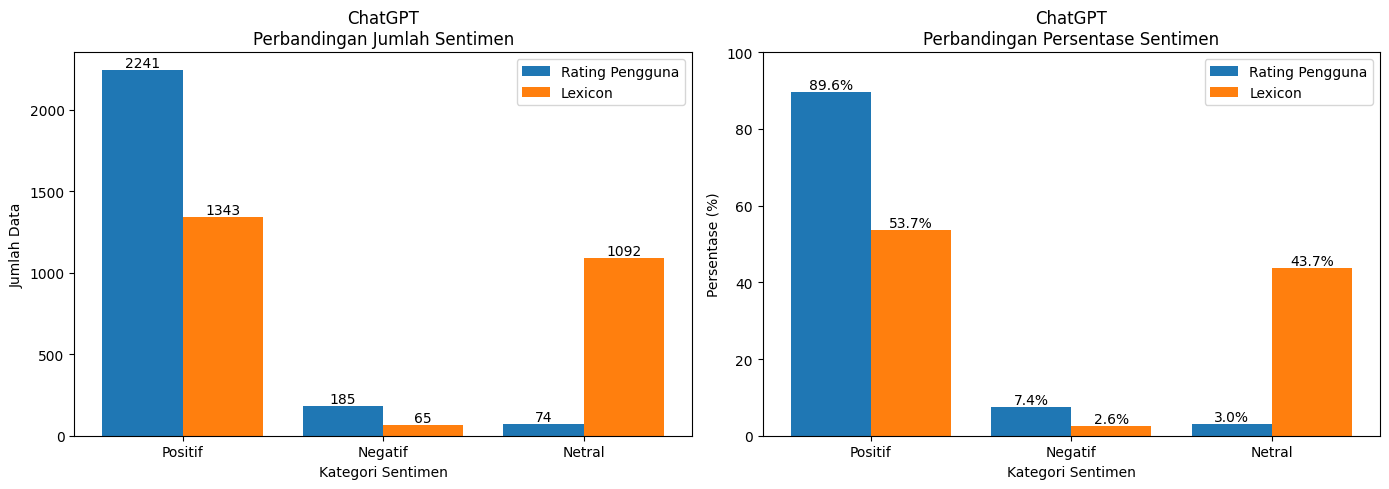

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Label sentimen
label_sentimen = ['Positif', 'Negatif', 'Netral']

# Rekap jumlah sentimen
jumlah_rating = (
    df_chatgpt['label_sentimen']
    .value_counts()
    .reindex(label_sentimen, fill_value=0)
)

jumlah_lexicon = (
    df_chatgpt['sentimen_lexicon']
    .value_counts()
    .reindex(label_sentimen, fill_value=0)
)

# Hitung persentase
persen_rating = (jumlah_rating / jumlah_rating.sum()) * 100
persen_lexicon = (jumlah_lexicon / jumlah_lexicon.sum()) * 100

# Posisi sumbu X
posisi = np.arange(len(label_sentimen))
lebar_bar = 0.4

# Membuat figure
plt.figure(figsize=(14, 5))

# ===== Grafik 1: Jumlah Data =====
plt.subplot(1, 2, 1)
bar_rating = plt.bar(
    posisi - lebar_bar/2,
    jumlah_rating,
    lebar_bar,
    label='Rating Pengguna'
)

bar_lex = plt.bar(
    posisi + lebar_bar/2,
    jumlah_lexicon,
    lebar_bar,
    label='Lexicon'
)

plt.title('ChatGPT\nPerbandingan Jumlah Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(posisi, label_sentimen)
plt.legend()

for b in bar_rating:
    plt.text(
        b.get_x() + b.get_width()/2,
        b.get_height(),
        int(b.get_height()),
        ha='center', va='bottom'
    )

for b in bar_lex:
    plt.text(
        b.get_x() + b.get_width()/2,
        b.get_height(),
        int(b.get_height()),
        ha='center', va='bottom'
    )

# ===== Grafik 2: Persentase =====
plt.subplot(1, 2, 2)
bar_rating_p = plt.bar(
    posisi - lebar_bar/2,
    persen_rating,
    lebar_bar,
    label='Rating Pengguna'
)

bar_lex_p = plt.bar(
    posisi + lebar_bar/2,
    persen_lexicon,
    lebar_bar,
    label='Lexicon'
)

plt.title('ChatGPT\nPerbandingan Persentase Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(posisi, label_sentimen)
plt.ylim(0, 100)
plt.legend()

for b in bar_rating_p:
    plt.text(
        b.get_x() + b.get_width()/2,
        b.get_height(),
        f"{b.get_height():.1f}%",
        ha='center', va='bottom'
    )

for b in bar_lex_p:
    plt.text(
        b.get_x() + b.get_width()/2,
        b.get_height(),
        f"{b.get_height():.1f}%",
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tampilkan_wordcloud(dataframe, kolom_teks, judul_grafik):
    # Gabungkan seluruh teks ulasan
    kumpulan_teks = " ".join(
        dataframe[kolom_teks].astype(str).values
    )

    # Inisialisasi WordCloud
    wordcloud = WordCloud(
        width=900,
        height=450,
        background_color="white",
        max_words=100,
        collocations=False
    )

    # Generate wordcloud
    hasil_wc = wordcloud.generate(kumpulan_teks)

    # Tampilkan visualisasi
    plt.figure(figsize=(10, 5))
    plt.imshow(hasil_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(judul_grafik, fontsize=14)
    plt.show()

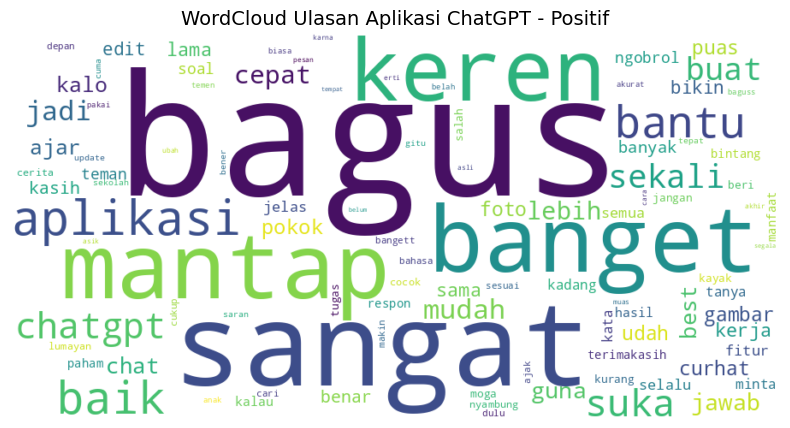

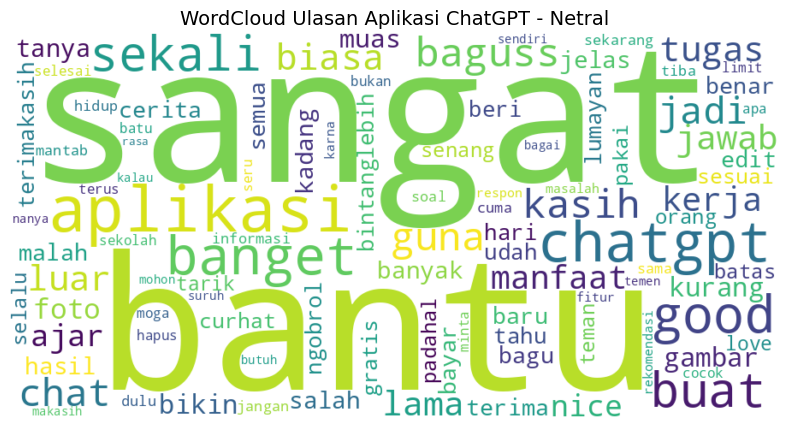

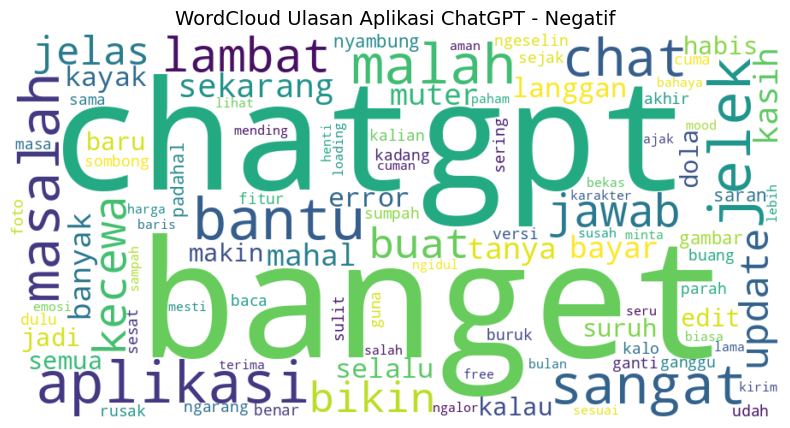

In [26]:
# WordCloud ulasan ChatGPT dengan sentimen POSITIF
tampilkan_wordcloud(
    df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    judul_grafik='WordCloud Ulasan Aplikasi ChatGPT - Positif'
)

# WordCloud ulasan ChatGPT dengan sentimen NETRAL
tampilkan_wordcloud(
    df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    judul_grafik='WordCloud Ulasan Aplikasi ChatGPT - Netral'
)

# WordCloud ulasan ChatGPT dengan sentimen NEGATIF
tampilkan_wordcloud(
    df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    judul_grafik='WordCloud Ulasan Aplikasi ChatGPT - Negatif'
)

In [27]:
import pandas as pd

# Fungsi pembentuk bigram
def buat_bigram(teks):
    if not isinstance(teks, str):
        return []
    token = teks.split()
    pasangan = []
    for i in range(len(token) - 1):
        pasangan.append(f"{token[i]} {token[i+1]}")
    return pasangan


# Proses pembentukan bigram
df_chatgpt['bigram_list'] = df_chatgpt['hasil_stemming'].apply(buat_bigram)

# Gabungkan bigram menjadi satu teks
df_chatgpt['bigram_gabungan'] = df_chatgpt['bigram_list'].apply(
    lambda bg: "; ".join(bg)
)

# Simpan ke Excel
output_file = "hasil_bigram_chatgpt.xlsx"
df_chatgpt.to_excel(
    output_file,
    index=False
)

print(f"File Excel berhasil dibuat: {output_file}")

File Excel berhasil dibuat: hasil_bigram_chatgpt.xlsx


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def visualisasi_ngram_chatgpt(data, kolom_teks, rentang_ngram, judul_chart, warna_bar):
    # Inisialisasi vectorizer
    vectorizer = CountVectorizer(ngram_range=rentang_ngram)
    matriks = vectorizer.fit_transform(
        data[kolom_teks].dropna()
    )

    # Hitung frekuensi n-gram
    hasil_freq = pd.DataFrame({
        'ngram': vectorizer.get_feature_names_out(),
        'jumlah': matriks.sum(axis=0).A1
    })

    # Ambil 10 teratas
    top_ngram = hasil_freq.sort_values(
        by='jumlah',
        ascending=False
    ).head(10)

    # Plot horizontal bar
    plt.figure(figsize=(9, 5))
    plt.barh(
        top_ngram['ngram'],
        top_ngram['jumlah'],
        color=warna_bar,
        edgecolor='gray'
    )
    plt.gca().invert_yaxis()
    plt.title(judul_chart, fontsize=13)
    plt.xlabel("Jumlah Kemunculan")
    plt.ylabel("N-Gram")
    plt.tight_layout()
    plt.show()

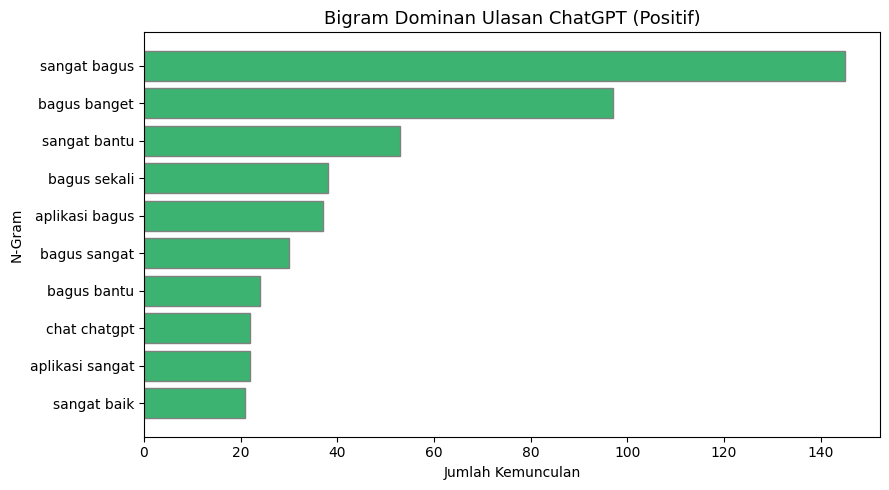

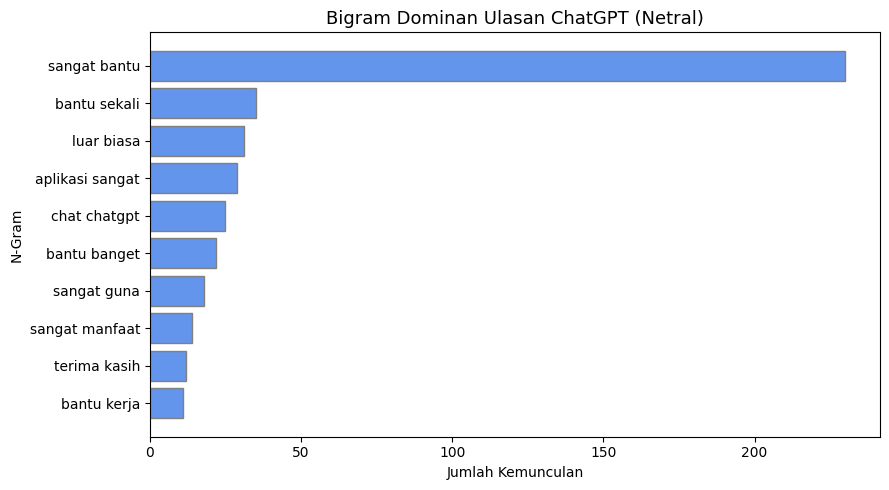

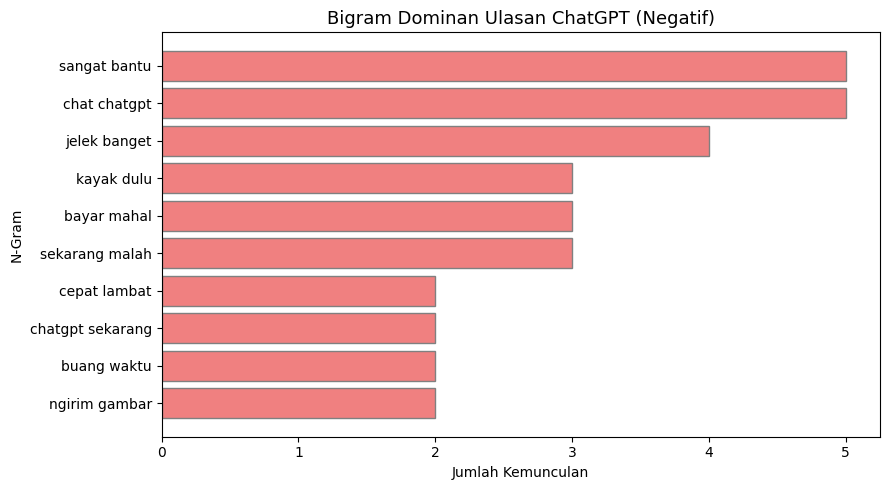

In [29]:
# Bigram sentimen POSITIF ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt.loc[df_chatgpt['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(2, 2),
    judul_chart='Bigram Dominan Ulasan ChatGPT (Positif)',
    warna_bar='mediumseagreen'
)

# Bigram sentimen NETRAL ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt.loc[df_chatgpt['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(2, 2),
    judul_chart='Bigram Dominan Ulasan ChatGPT (Netral)',
    warna_bar='cornflowerblue'
)

# Bigram sentimen NEGATIF ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt.loc[df_chatgpt['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(2, 2),
    judul_chart='Bigram Dominan Ulasan ChatGPT (Negatif)',
    warna_bar='lightcoral'
)

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# fungsi pembentuk trigram
def buat_trigram_tokens(teks):
    if pd.isna(teks):
        return []
    kata = teks.split()
    return [' '.join(kata[i:i+3]) for i in range(len(kata) - 2)]


# proses trigram pada data ChatGPT
df_chatgpt['trigram_tokens'] = df_chatgpt['hasil_stemming'].apply(buat_trigram_tokens)

# gabungkan trigram menjadi satu kolom teks
df_chatgpt['trigram_text'] = df_chatgpt['trigram_tokens'].apply(
    lambda x: ', '.join(x)
)

# simpan ke Excel
df_chatgpt.to_excel(
    "hasil_trigram_chatgpt.xlsx",
    index=False
)

print("File Excel berhasil disimpan: hasil_trigram_chatgpt.xlsx")

File Excel berhasil disimpan: hasil_trigram_chatgpt.xlsx


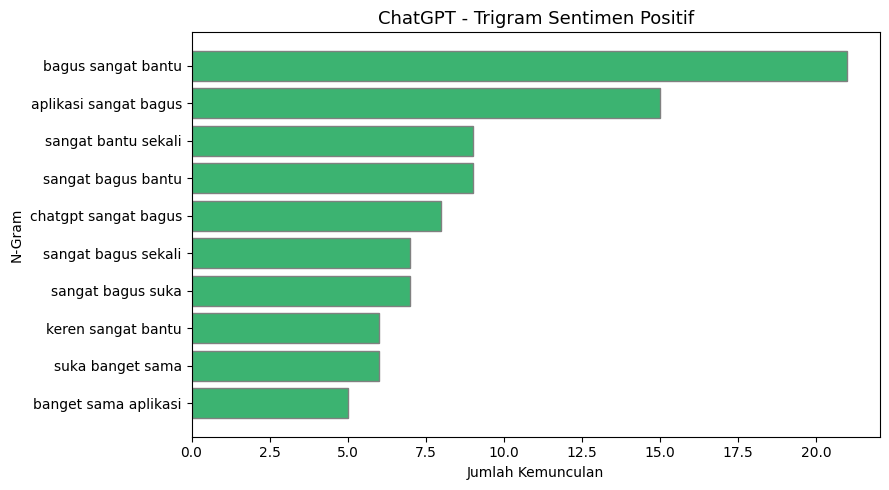

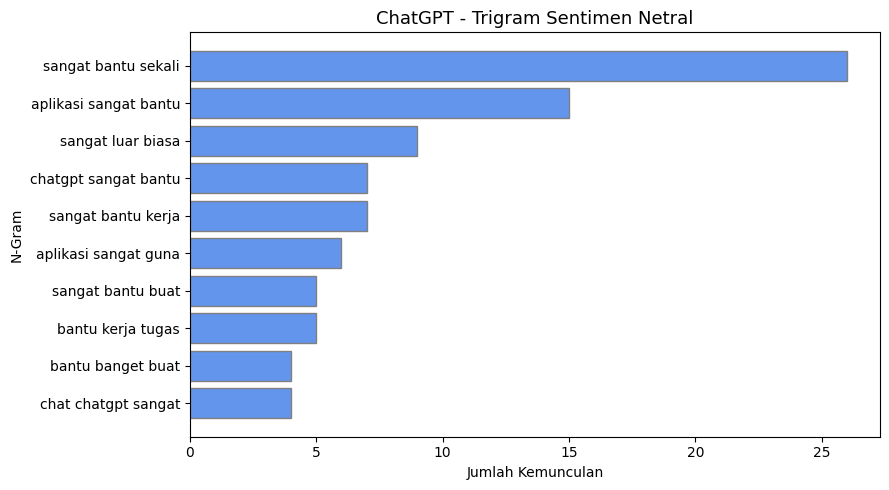

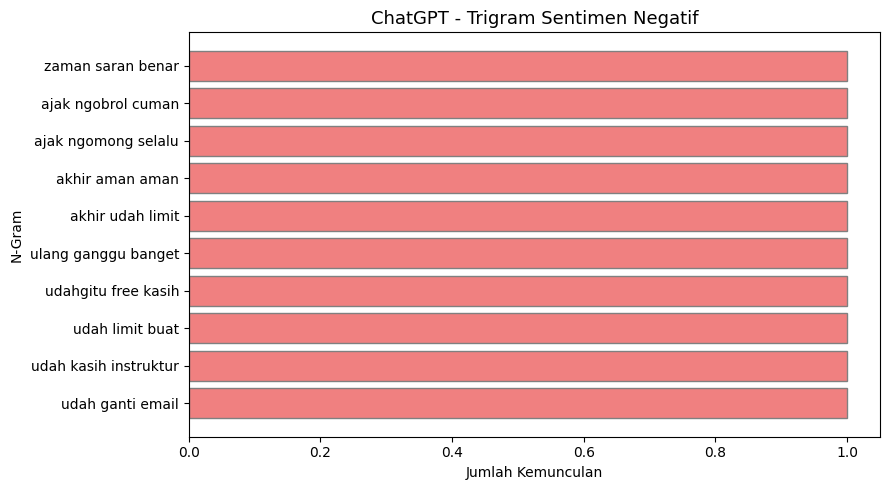

In [31]:
# Trigram sentimen POSITIF ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(3, 3),
    judul_chart='ChatGPT - Trigram Sentimen Positif',
    warna_bar='mediumseagreen'
)

# Trigram sentimen NETRAL ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(3, 3),
    judul_chart='ChatGPT - Trigram Sentimen Netral',
    warna_bar='cornflowerblue'
)

# Trigram sentimen NEGATIF ChatGPT
visualisasi_ngram_chatgpt(
    data=df_chatgpt[df_chatgpt['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    rentang_ngram=(3, 3),
    judul_chart='ChatGPT - Trigram Sentimen Negatif',
    warna_bar='lightcoral'
)

Tingkat kepuasan Meta AI

In [32]:
import re

# kamus normalisasi khusus ulasan aplikasi AI
kamus_normalisasi = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "bgt": "banget",
    "bgtt": "banget",
    "udh": "sudah",
    "blm": "belum",
    "aja": "saja",
    "yg": "yang",
    "lg": "lagi",
    "jd": "jadi",
    "apk": "aplikasi",
    "apps": "aplikasi",
    "ai": "ai",
    "lemot": "lambat",
    "ngelag": "lag",
    "errorrr": "error",
    "mantappp": "mantap",
    "kereenn": "keren",
    "recommended": "direkomendasikan"
}

def normalisasi_kata(teks):
    kata = teks.split()
    return " ".join([kamus_normalisasi.get(k, k) for k in kata])

def hapus_huruf_ganda(teks):
    return re.sub(r'(.)\1{2,}', r'\1', teks)

def proses_cleaning(teks):
    teks = str(teks).lower()                       # case folding
    teks = re.sub(r'http\S+', '', teks)            # hapus URL
    teks = re.sub(r'[^\x00-\x7F]+', ' ', teks)     # hapus non ASCII
    teks = hapus_huruf_ganda(teks)                 # huruf berulang
    teks = normalisasi_kata(teks)                  # normalisasi
    teks = re.sub(r'[^\w\s]', ' ', teks)           # tanda baca
    teks = re.sub(r'\d+', ' ', teks)               # angka
    teks = re.sub(r'\s+', ' ', teks).strip()       # spasi
    teks = ' '.join([w for w in teks.split() if len(w) > 3])
    return teks

df_metaai['clean_review'] = df_metaai['review'].fillna('').apply(proses_cleaning)

df_metaai[['review', 'clean_review']].head()

,review,clean_review
0,oke,
1,Kenapah sering Lemot setiap pake Lama FB nya m...,kenapah sering lambat setiap pake lama tolong ...
2,mantaf rekomendasi Poko ya,mantaf rekomendasi poko
3,biasa,biasa
4,good 🥰🥰,good


In [33]:
df_metaai.to_excel(
    "hasil_cleaning_metaai.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_cleaning_metaai.xlsx")

File Excel berhasil dibuat: hasil_cleaning_metaai.xlsx


In [34]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat daftar stopword bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
daftar_stopword = set(stopword_factory.get_stop_words())

def hapus_stopword(teks):
    kata = teks.split()
    hasil = [k for k in kata if k not in daftar_stopword]
    return " ".join(hasil)

# Terapkan ke data Meta AI
df_metaai['text_no_stopword'] = (
    df_metaai['clean_review']
    .fillna('')
    .apply(hapus_stopword)
)

# Tampilkan contoh hasil
print(df_metaai[['clean_review', 'text_no_stopword']].head())

# Simpan ke Excel
df_metaai.to_excel(
    "hasil_stopword_metaai.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_stopword_metaai.xlsx")

                                        clean_review  \
0                                                      
1  kenapah sering lambat setiap pake lama tolong ...   
2                            mantaf rekomendasi poko   
3                                              biasa   
4                                               good   

                              text_no_stopword  
0                                               
1  kenapah sering lambat pake lama bantu admin  
2                      mantaf rekomendasi poko  
3                                        biasa  
4                                         good  
File Excel berhasil dibuat: hasil_stopword_metaai.xlsx


In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer bahasa Indonesia
stem_factory = StemmerFactory()
stemmer_indo = stem_factory.create_stemmer()

def lakukan_stemming(teks):
    kata_list = teks.split()
    hasil = [stemmer_indo.stem(kata) for kata in kata_list]
    return " ".join(hasil)

# Terapkan ke data Meta AI
df_metaai['hasil_stemming'] = (
    df_metaai['text_no_stopword']
    .fillna('')
    .apply(lakukan_stemming)
)

# Tampilkan contoh hasil
print(
    df_metaai[
        ['clean_review', 'text_no_stopword', 'hasil_stemming']
    ].head()
)

# Simpan ke Excel
df_metaai.to_excel(
    "hasil_stemming_metaai.xlsx",
    index=False
)

print("File Excel berhasil dibuat: hasil_stemming_metaai.xlsx")

                                        clean_review  \
0                                                      
1  kenapah sering lambat setiap pake lama tolong ...   
2                            mantaf rekomendasi poko   
3                                              biasa   
4                                               good   

                              text_no_stopword  \
0                                                
1  kenapah sering lambat pake lama bantu admin   
2                      mantaf rekomendasi poko   
3                                        biasa   
4                                         good   

                                hasil_stemming  
0                                               
1  kenapah sering lambat pake lama bantu admin  
2                      mantaf rekomendasi poko  
3                                        biasa  
4                                         good  
File Excel berhasil dibuat: hasil_stemming_metaai.xlsx


In [36]:
def klasifikasi_rating(skor):
    if skor <= 2:
        return "Negatif"
    elif skor == 3:
        return "Netral"
    else:
        return "Positif"

# Terapkan ke data Meta AI
df_metaai['sentimen_awal'] = df_metaai['rating'].apply(klasifikasi_rating)

# Tampilkan contoh hasil
print(
    df_metaai[
        ['rating', 'sentimen_awal']
    ].head()
)

   rating sentimen_awal
0       5       Positif
1       5       Positif
2       5       Positif
3       5       Positif
4       5       Positif


In [37]:
from IPython.display import display

# Kumpulan kata bernuansa positif untuk aplikasi Meta AI
lexicon_positif_metaai = [
    'bagus', 'mantap', 'cepat', 'praktis', 'puas', 'keren',
    'stabil', 'jelas', 'oke', 'baik', 'lancar',
    'mantul', 'recommended', 'nyaman', 'suka', 'terbaik',
    'responsif', 'akurat'
]

# Kumpulan kata bernuansa negatif untuk aplikasi Meta AI
lexicon_negatif_metaai = [
    'jelek', 'buruk', 'lemot', 'error', 'mahal', 'kecewa',
    'parah', 'lag', 'rusak', 'lambat', 'sulit', 'ribet',
    'gagal', 'macet', 'berhenti', 'buffer', 'loading',
    'hapus', 'masalah', 'payah', 'gangguan'
]

# Kata penyangkal (negasi) yang memengaruhi sentimen
kata_negasi_metaai = [
    'tidak', 'kurang', 'bukan', 'gak', 'nggak', 'belum'
]

In [38]:
def klasifikasi_sentimen_metaai(teks_ulasan):
    # Jika data bukan string, otomatis netral
    if not isinstance(teks_ulasan, str):
        return "Netral"

    daftar_token = teks_ulasan.lower().split()
    skor_sentimen = 0

    for i, kata in enumerate(daftar_token):

        # Cek kata positif
        if kata in lexicon_positif_metaai:
            skor_sentimen += 1

        # Cek kata negatif
        elif kata in lexicon_negatif_metaai:
            skor_sentimen -= 1

        # Penanganan kata negasi
        if kata in kata_negasi_metaai and i + 1 < len(daftar_token):
            kata_berikutnya = daftar_token[i + 1]

            if kata_berikutnya in lexicon_positif_metaai:
                skor_sentimen -= 1
            elif kata_berikutnya in lexicon_negatif_metaai:
                skor_sentimen += 1

    # Penentuan label akhir
    if skor_sentimen > 0:
        return "Positif"
    elif skor_sentimen < 0:
        return "Negatif"
    else:
        return "Netral"

In [39]:
df_metaai['sentimen_lexicon'] = df_metaai['hasil_stemming'].apply(hitung_sentimen)

In [40]:
df_valid = df_metaai[
    (df_metaai['sentimen_awal'] == df_metaai['sentimen_lexicon']) |
    (df_metaai['sentimen_lexicon'] == 'Netral')
].copy()

In [41]:
print("Total data awal :", len(df_metaai))
print("Data valid      :", len(df_valid))
print("Data dihapus    :", len(df_metaai) - len(df_valid))

Total data awal : 2500
Data valid      : 2386
Data dihapus    : 114


In [42]:
file_output = "hasil_sentimen_valid_metaai.xlsx"

df_valid.to_excel(
    file_output,
    index=False,
    sheet_name="Data_Valid_Sentimen"
)

In [43]:
display(
    df_metaai[
        ['rating','sentimen_awal','sentimen_lexicon','hasil_stemming']
    ].head(10)
)

print(f"Data berhasil disimpan ke file: {file_output}")

,rating,sentimen_awal,sentimen_lexicon,hasil_stemming
0,5,Positif,Netral,
1,5,Positif,Negatif,kenapah sering lambat pake lama bantu admin
2,5,Positif,Netral,mantaf rekomendasi poko
3,5,Positif,Netral,biasa
4,5,Positif,Netral,good
5,1,Negatif,Netral,terlalu banyak iklan judi slot
6,5,Positif,Netral,sangat manfaat
7,5,Positif,Netral,delapan bulan monetisasi konten ikan akun sehat
8,5,Positif,Netral,bgus
9,5,Positif,Positif,bagus


Data berhasil disimpan ke file: hasil_sentimen_valid_metaai.xlsx


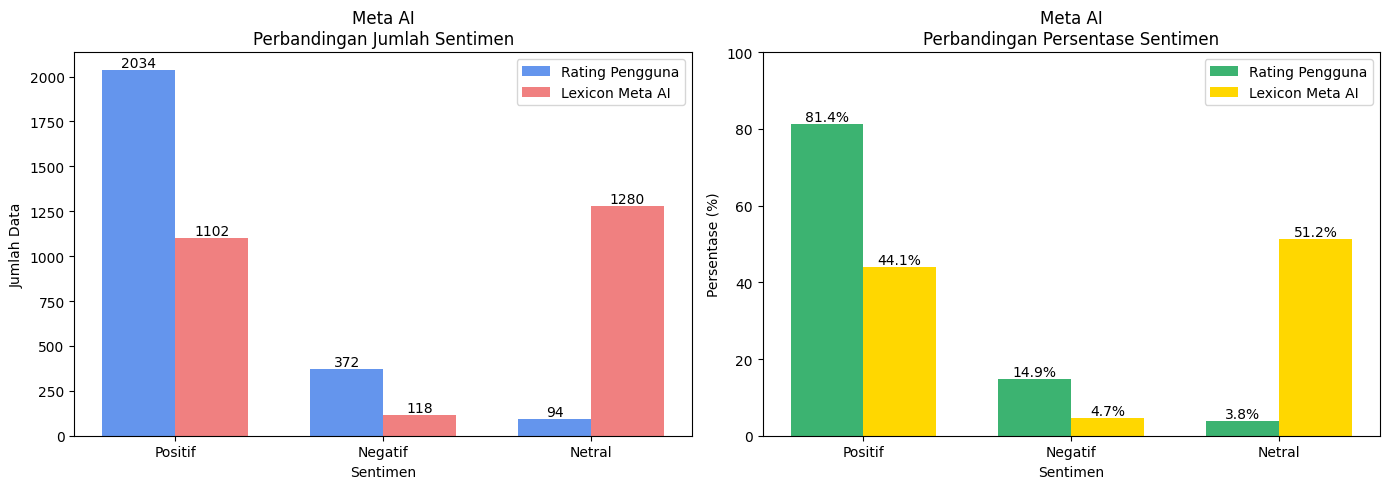

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Kategori sentimen
kategori_sentimen = ['Positif', 'Negatif', 'Netral']

# Rekap jumlah berdasarkan label rating
rekap_rating = (
    df_metaai['sentimen_awal']
    .value_counts()
    .reindex(kategori_sentimen, fill_value=0)
)

# Rekap jumlah berdasarkan lexicon
rekap_lexicon = (
    df_metaai['sentimen_lexicon']
    .value_counts()
    .reindex(kategori_sentimen, fill_value=0)
)

# Hitung persentase
persen_rating = rekap_rating / rekap_rating.sum() * 100
persen_lexicon = rekap_lexicon / rekap_lexicon.sum() * 100

# Posisi sumbu X
x_pos = np.arange(len(kategori_sentimen))
lebar = 0.35

plt.figure(figsize=(14, 5))

# ================= Grafik Jumlah =================
plt.subplot(1, 2, 1)
bar1 = plt.bar(
    x_pos - lebar/2,
    rekap_rating,
    lebar,
    label='Rating Pengguna',
    color='cornflowerblue'
)

bar2 = plt.bar(
    x_pos + lebar/2,
    rekap_lexicon,
    lebar,
    label='Lexicon Meta AI',
    color='lightcoral'
)

plt.title('Meta AI\nPerbandingan Jumlah Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(x_pos, kategori_sentimen)
plt.legend()

for bar in bar1 + bar2:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center', va='bottom'
    )

# ================= Grafik Persentase =================
plt.subplot(1, 2, 2)
bar3 = plt.bar(
    x_pos - lebar/2,
    persen_rating,
    lebar,
    label='Rating Pengguna',
    color='mediumseagreen'
)

bar4 = plt.bar(
    x_pos + lebar/2,
    persen_lexicon,
    lebar,
    label='Lexicon Meta AI',
    color='gold'
)

plt.title('Meta AI\nPerbandingan Persentase Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(x_pos, kategori_sentimen)
plt.ylim(0, 100)
plt.legend()

for bar in bar3 + bar4:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}%",
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualisasi_wordcloud_metaai(df_metaai, kolom_teks, judul):
    # Menggabungkan seluruh teks ulasan menjadi satu string
    teks_ulasan = " ".join(
        df_metaai[kolom_teks].fillna("").astype(str).tolist()
    )

    # Membuat objek WordCloud
    wc_metaai = WordCloud(
        width=900,
        height=450,
        background_color="lavender",
        max_words=120,
        colormap="viridis",
        collocations=False
    )

    # Proses pembuatan wordcloud
    hasil_wordcloud = wc_metaai.generate(teks_ulasan)

    # Menampilkan hasil visualisasi
    plt.figure(figsize=(10, 5))
    plt.imshow(hasil_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(judul, fontsize=14)
    plt.show()

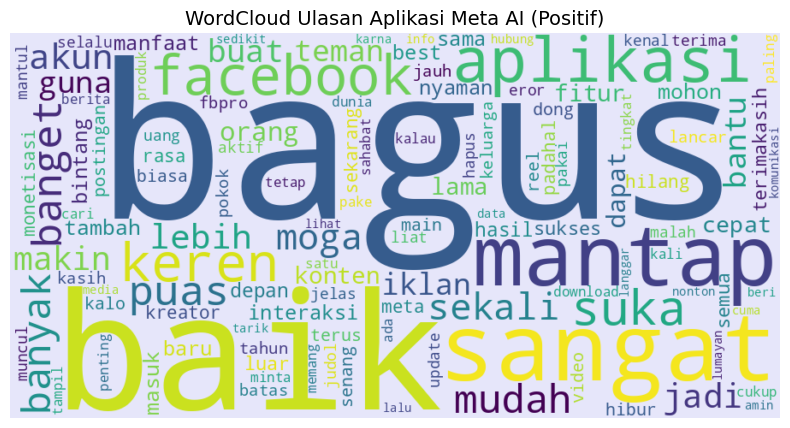

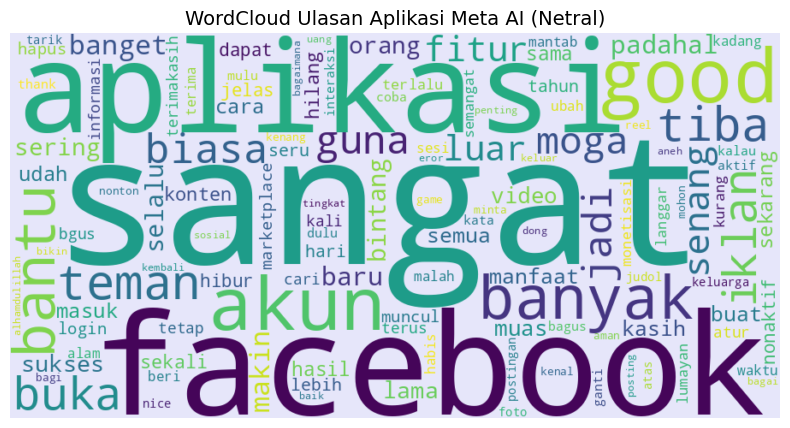

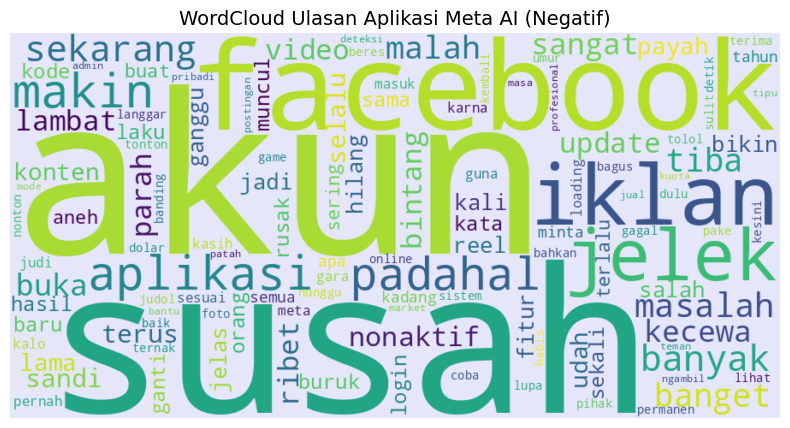

In [47]:
# WordCloud ulasan Meta AI - Sentimen POSITIF
visualisasi_wordcloud_metaai(
    df_metaai[df_metaai['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    judul='WordCloud Ulasan Aplikasi Meta AI (Positif)'
)

# WordCloud ulasan Meta AI - Sentimen NETRAL
visualisasi_wordcloud_metaai(
    df_metaai[df_metaai['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    judul='WordCloud Ulasan Aplikasi Meta AI (Netral)'
)

# WordCloud ulasan Meta AI - Sentimen NEGATIF
visualisasi_wordcloud_metaai(
    df_metaai[df_metaai['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    judul='WordCloud Ulasan Aplikasi Meta AI (Negatif)'
)

In [48]:
import pandas as pd

# Fungsi untuk membentuk pasangan kata (bigram)
def ekstrak_bigram_metaai(teks):
    if type(teks) != str:
        return []
    kata = teks.split()
    hasil = [
        kata[i] + " " + kata[i + 1]
        for i in range(len(kata) - 1)
    ]
    return hasil


# Terapkan proses bigram pada data Meta AI
df_metaai['daftar_bigram'] = (
    df_metaai['hasil_stemming']
    .apply(ekstrak_bigram_metaai)
)

# Gabungkan bigram menjadi teks
df_metaai['bigram_teks'] = (
    df_metaai['daftar_bigram']
    .apply(lambda x: " | ".join(x))
)

# Simpan ke file Excel
nama_file = "hasil_bigram_metaai.xlsx"
df_metaai.to_excel(
    nama_file,
    index=False
)

print(f"File Excel berhasil disimpan: {nama_file}")

File Excel berhasil disimpan: hasil_bigram_metaai.xlsx


In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def visualisasi_ngram_metaai(df_data, kolom_teks, ngram_range, judul_gambar, warna):
    # Membuat objek CountVectorizer
    cv = CountVectorizer(ngram_range=ngram_range)
    fitur = cv.fit_transform(
        df_data[kolom_teks].dropna()
    )

    # Rekap frekuensi n-gram
    df_freq = pd.DataFrame({
        'frasa': cv.get_feature_names_out(),
        'frekuensi': fitur.sum(axis=0).A1
    })

    # Ambil 10 n-gram teratas
    df_top = (
        df_freq
        .sort_values(by='frekuensi', ascending=False)
        .head(10)
    )

    # Visualisasi bar horizontal
    plt.figure(figsize=(9, 5))
    plt.barh(
        df_top['frasa'],
        df_top['frekuensi'],
        color=warna,
        edgecolor='black'
    )
    plt.gca().invert_yaxis()
    plt.title(judul_gambar, fontsize=13)
    plt.xlabel("Frekuensi Kemunculan")
    plt.ylabel("Kata / Frasa")
    plt.tight_layout()
    plt.show()

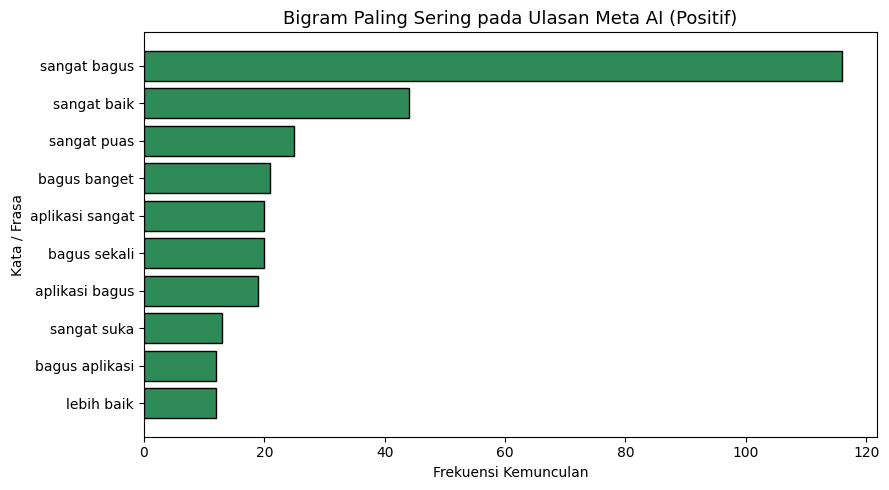

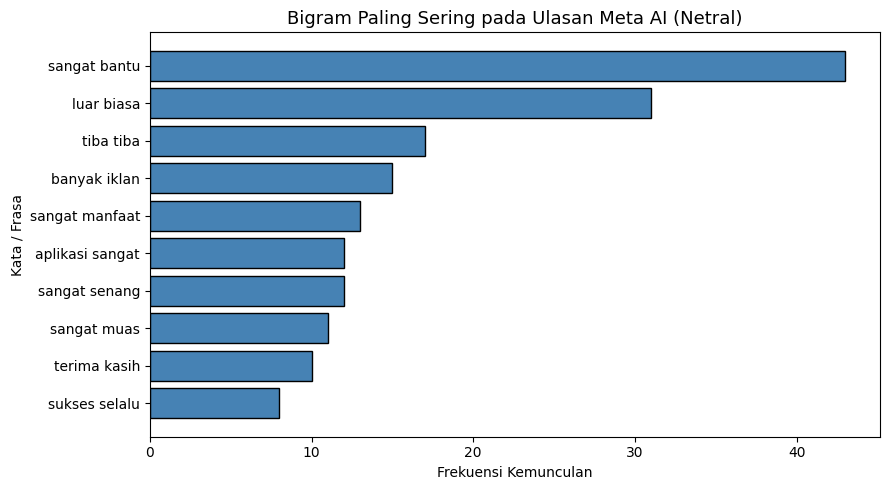

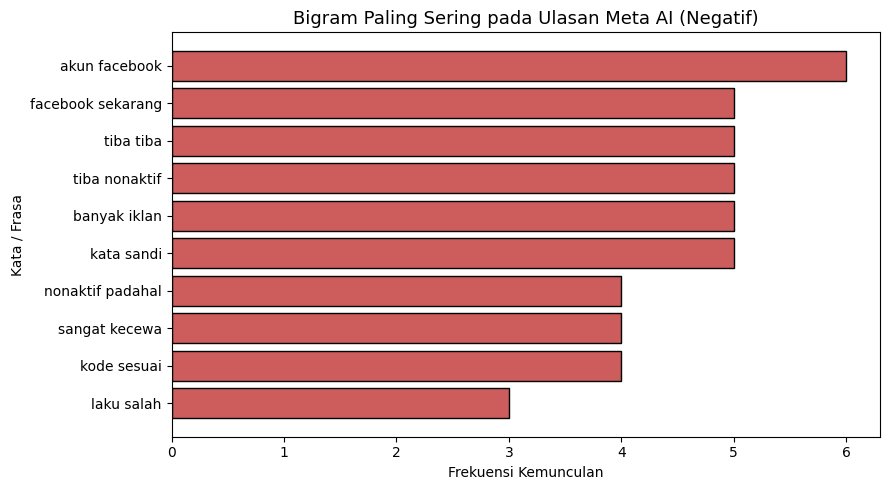

In [50]:
# Bigram sentimen POSITIF Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    ngram_range=(2, 2),
    judul_gambar='Bigram Paling Sering pada Ulasan Meta AI (Positif)',
    warna='seagreen'
)

# Bigram sentimen NETRAL Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    ngram_range=(2, 2),
    judul_gambar='Bigram Paling Sering pada Ulasan Meta AI (Netral)',
    warna='steelblue'
)

# Bigram sentimen NEGATIF Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    ngram_range=(2, 2),
    judul_gambar='Bigram Paling Sering pada Ulasan Meta AI (Negatif)',
    warna='indianred'
)

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Fungsi untuk membentuk trigram dari teks
def ekstrak_trigram_metaai(teks):
    if not isinstance(teks, str):
        return []
    kata_list = teks.split()
    hasil_trigram = [
        " ".join(kata_list[i:i+3])
        for i in range(len(kata_list) - 2)
    ]
    return hasil_trigram


# Terapkan proses trigram pada data Meta AI
df_metaai['daftar_trigram'] = (
    df_metaai['hasil_stemming']
    .apply(ekstrak_trigram_metaai)
)

# Gabungkan trigram menjadi satu kolom teks
df_metaai['trigram_teks'] = (
    df_metaai['daftar_trigram']
    .apply(lambda tg: " | ".join(tg))
)

# Simpan ke file Excel
nama_file = "hasil_trigram_metaai.xlsx"
df_metaai.to_excel(
    nama_file,
    index=False
)

print(f"File Excel berhasil dibuat: {nama_file}")

File Excel berhasil dibuat: hasil_trigram_metaai.xlsx


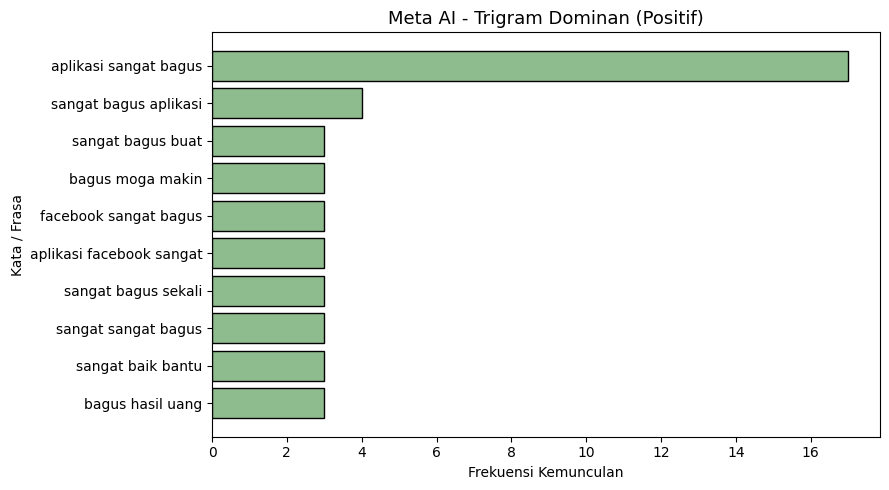

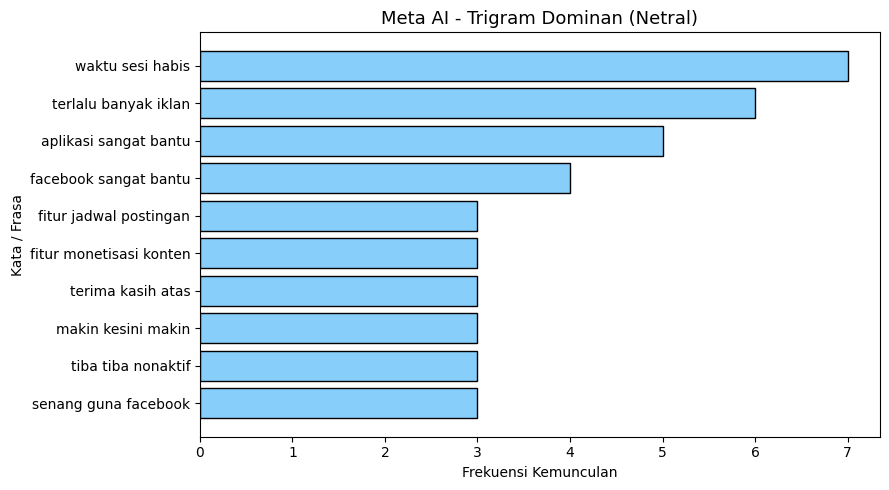

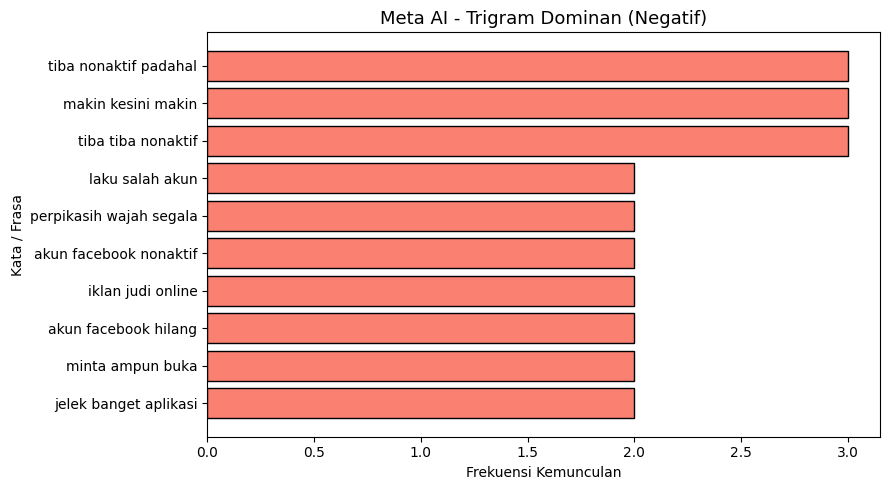

In [52]:
# Trigram sentimen POSITIF Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Positif'],
    kolom_teks='hasil_stemming',
    ngram_range=(3, 3),
    judul_gambar='Meta AI - Trigram Dominan (Positif)',
    warna='darkseagreen'
)

# Trigram sentimen NETRAL Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Netral'],
    kolom_teks='hasil_stemming',
    ngram_range=(3, 3),
    judul_gambar='Meta AI - Trigram Dominan (Netral)',
    warna='lightskyblue'
)

# Trigram sentimen NEGATIF Meta AI
visualisasi_ngram_metaai(
    df_data=df_metaai[df_metaai['sentimen_lexicon'] == 'Negatif'],
    kolom_teks='hasil_stemming',
    ngram_range=(3, 3),
    judul_gambar='Meta AI - Trigram Dominan (Negatif)',
    warna='salmon'
)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_valid['hasil_stemming'])
y = df_valid['sentimen_lexicon']

# Split data 80% train - 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Akurasi Naive Bayes:", accuracy_nb)

Akurasi Naive Bayes: 0.9016736401673641


In [62]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Akurasi SVM:", accuracy_svm)

Akurasi SVM: 0.9581589958158996


In [63]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Akurasi Logistic Regression:", accuracy_lr)

Akurasi Logistic Regression: 0.9184100418410042


In [64]:
print("Ringkasan Akurasi Model")
print("----------------------")
print(f"Naive Bayes          : {accuracy_nb:.2f}")
print(f"Support Vector Machine: {accuracy_svm:.2f}")
print(f"Logistic Regression  : {accuracy_lr:.2f}")

Ringkasan Akurasi Model
----------------------
Naive Bayes          : 0.90
Support Vector Machine: 0.96
Logistic Regression  : 0.92
